**Q1. What is the mathematical formula for a linear SVM?**

The mathematical formulation of a linear SVM aims to find a hyperplane that separates data points of different classes. The hyperplane can be expressed as:

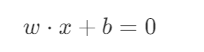

`Where:`

* w is the weight vector (normal to the hyperplane).
* x is the input feature vector.
* b is the bias term.

The goal is to maximize the margin γ between the two classes, which can be defined as:

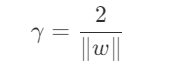

**Q2. What is the objective function of a linear SVM?**

The objective function in SVM is to minimize the following:

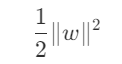

subject to the constraints:

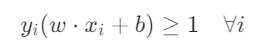

`Where:`

* yi is the class label of the i-th training example.
* xi is the feature vector of the i-th training example.

**Q4. What is the role of support vectors in SVM Explain with example**

Support vectors are the data points that lie closest to the decision boundary (hyperplane). They are critical because:

* They define the position and orientation of the hyperplane.
* Removing non-support vectors does not affect the model, but removing support vectors can change the decision boundary.

Example: In a binary classification problem, if you have a set of points in a 2D space, the support vectors are the points that are closest to the separating line. These points are essential for determining the optimal hyperplane.

**Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?**

* Hyperplane: A line (in 2D) that separates the classes.
* Margin: The distance between the hyperplane and the nearest data points from either class.
* Hard Margin: Assumes that the data is linearly separable without any misclassifications.
* Soft Margin: Allows some misclassifications to achieve better generalization on non-linearly separable data.

**Q6. SVM Implementation through Iris dataset.**

Accuracy: 80.00%


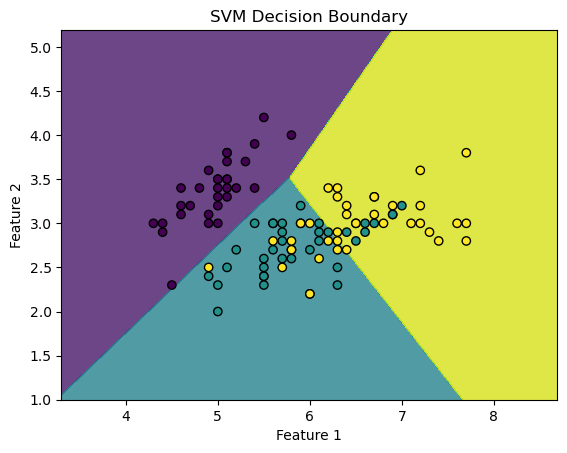

Custom SVM Accuracy: 28.89%


In [1]:
# Import necessary libraries  
import pandas as pd  
from sklearn import datasets  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
import matplotlib.pyplot as plt  
import numpy as np  

# Load the Iris dataset  
iris = datasets.load_iris()  
X = iris.data[:, :2]  # Use only the first two features for visualization  
y = iris.target  

# Split the dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

# Train a linear SVM classifier  
model = SVC(kernel='linear', C=1.0)  # C is the regularization parameter  
model.fit(X_train, y_train)  

# Predict the labels for the test set  
y_pred = model.predict(X_test)  

# Compute the accuracy  
accuracy = model.score(X_test, y_test)  
print(f'Accuracy: {accuracy * 100:.2f}%')  

# Plot the decision boundaries  
def plot_decision_boundaries(X, y, model):  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  
                         np.arange(y_min, y_max, 0.01))  
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)  
    plt.contourf(xx, yy, Z, alpha=0.8)  
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')  
    plt.title('SVM Decision Boundary')  
    plt.xlabel('Feature 1')  
    plt.ylabel('Feature 2')  
    plt.show()  

plot_decision_boundaries(X_train, y_train, model)  

# Bonus Task: Implement a linear SVM classifier from scratch  
from sklearn.metrics import accuracy_score  

class LinearSVM:  
    def __init__(self, learning_rate=0.01, n_iters=1000):  
        self.lr = learning_rate  
        self.n_iters = n_iters  
        self.w = None  
        self.b = None  

    def fit(self, X, y):  
        n_samples, n_features = X.shape  
        self.w = np.zeros(n_features)  
        self.b = 0  

        y_ = np.where(y <= 0, -1, 1)  

        for _ in range(self.n_iters):  
            for idx, x_i in enumerate(X):  
                if y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1:  
                    self.w -= self.lr * (2 * 1/self.n_iters * self.w)  
                else:  
                    self.w -= self.lr * (2 * 1/self.n_iters * self.w - np.dot(x_i, y_[idx]))  
                    self.b -= self.lr * y_[idx]  

    def predict(self, X):  
        linear_output = np.dot(X, self.w) - self.b  
        return np.sign(linear_output)  

# Train the custom SVM  
custom_svm = LinearSVM()  
custom_svm.fit(X_train, y_train)  
y_pred_custom = custom_svm.predict(X_test)  

# Compute the accuracy of the custom SVM  
accuracy_custom = accuracy_score(y_test, y_pred_custom)  
print(f'Custom SVM Accuracy: {accuracy_custom * 100:.2f}%')